# Projeto de Classificação Automática de Imagens de Roupas

## Introdução

Este projeto visa desenvolver um sistema automatizado para classificar imagens de roupas em diferentes categorias. A ideia é que, toda vez que uma nova imagem de roupa for adicionada à plataforma, o sistema classifique automaticamente o tipo de roupa presente na imagem.

### Objetivo

O objetivo principal é construir um modelo de machine learning que possa identificar e categorizar diferentes tipos de roupas a partir de imagens fornecidas. Isso é essencial para melhorar a organização e a busca de produtos em plataformas de e-commerce e facilitar a experiência do usuário.

### Desafio

A classificação automática de imagens é um problema desafiador que envolve a aplicação de técnicas avançadas de processamento de imagens e aprendizado de máquina. O modelo deve ser capaz de aprender a partir de um conjunto de dados de imagens rotuladas e generalizar para novas imagens que não foram vistas durante o treinamento.

### Escopo do Projeto

- **Coleta de Dados**: Recolher um conjunto de imagens rotuladas de diferentes tipos de roupas.
- **Desenvolvimento do Modelo**: Utilizar técnicas de aprendizado profundo para criar um modelo de classificação.
- **Avaliação e Teste**: Avaliar o desempenho do modelo e ajustá-lo conforme necessário.

Este projeto é um exemplo de como a inteligência artificial pode ser aplicada para resolver problemas práticos e melhorar a eficiência em plataformas de e-commerce e outros ambientes que lidam com grandes volumes de dados visuais.

#### Importando as Bibliotecas

In [28]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model

#### Importando o Dataset

In [29]:
dataset = keras.datasets.fashion_mnist

#### Carregando os dados

In [30]:
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

#### O dataset contém duas tuplas:

1. **Dados de Treinamento**: Utilizados para ajustar o modelo.
2. **Dados de Teste**: Usados para avaliar a performance do modelo.

Essas tuplas são essenciais para garantir que o modelo aprenda e seja avaliado corretamente. Sendo elas:

In [31]:
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

#### Vamos investigas melhor os dados de treino.

In [32]:
imagens_treino.shape
identificacoes_treino.shape

(60000,)

- temos 60.000 imagens de treino cada uma com um array de 28 linhas e 28 colunas

#### Vamos investigas melhor os dados de teste.

In [33]:
imagens_treino.shape 
identificacoes_teste.shape

(10000,)

- Temos 10.000 imagens de treino cada uma com um array de 28 linhas e 28 colunas

#### Visualizando o que são as identificações

In [34]:
identificacoes_treino.min()
identificacoes_treino.max()
total_de_classificacoes = 10

#### O dataset contém:

- **Identificações das Imagens**: Um array numérico que associa cada imagem a uma identificação específica. As imagens são classificadas em 10 categorias, de 0 a 9. Isso é representado por um array com 10 posições, cada uma correspondendo a uma das classes possíveis.

#### Mapeamento dos Tipos de Roupa

Com base na documentação, cada número no array de classificações corresponde a um tipo específico de roupa. Abaixo está a atribuição de cada número à sua respectiva categoria de roupa:

- **0**: Camiseta
- **1**: Calça
- **2**: Pullover
- **3**: Vestido
- **4**: Casaco
- **5**: Sandália
- **6**: Camisa
- **7**: Tênis
- **8**: Bolsa
- **9**: Bota

In [35]:
nomes_classificacao = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                       'Casaco','Sandália', 'Camisa', 'Tênis',
                       'Bolsa', 'Bota']

#### Visualizando de 10 imagens e as Cores Presentes:

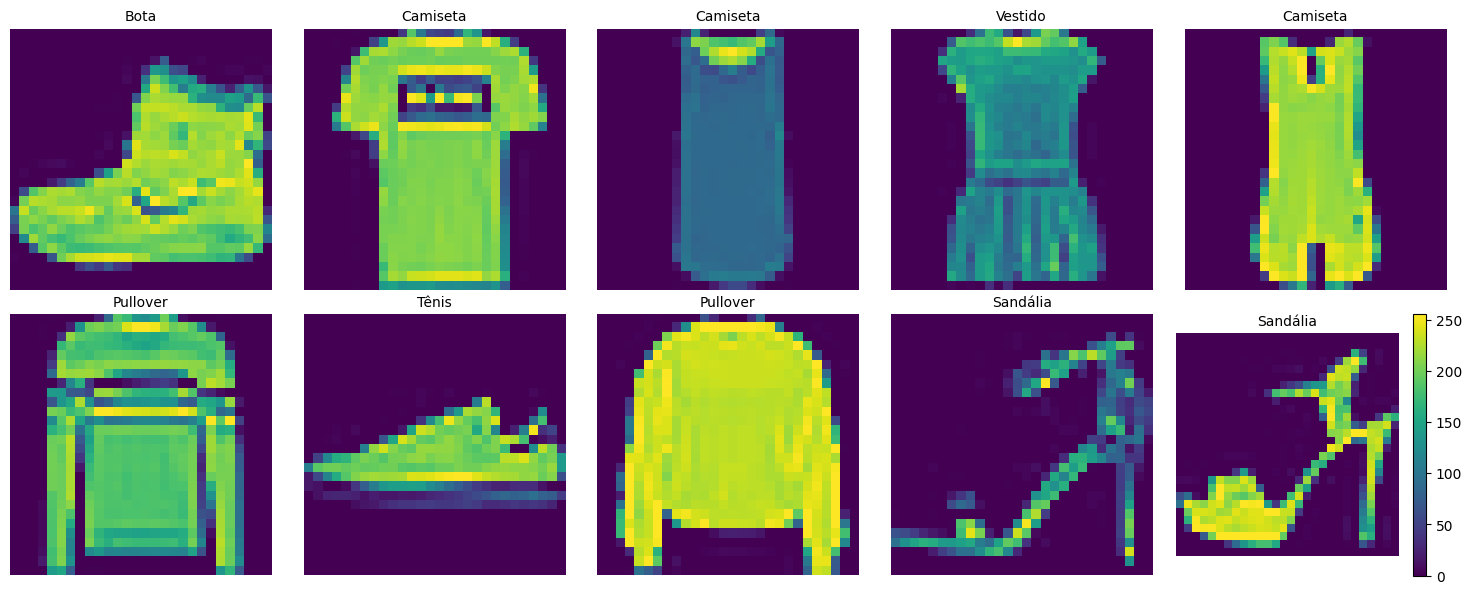

In [36]:
total_classificacoes = len(imagens_treino)

num_imagens = min(total_classificacoes, 10)
num_colunas = 5
num_linhas = (num_imagens + num_colunas - 1) // num_colunas

plt.figure(figsize=(num_colunas * 3, num_linhas * 3))
for i in range(num_imagens):
    ax = plt.subplot(num_linhas, num_colunas, i + 1)
    img = imagens_treino[i]
    if len(img.shape) == 2:  
        img = np.expand_dims(img, axis=-1)  
    im = ax.imshow(img)
    plt.title(nomes_classificacao[identificacoes_treino[i]], fontsize=10)
    plt.axis('off') 
    
plt.colorbar(im, ax=plt.gca(), orientation='vertical')

plt.tight_layout()
plt.show()


#### Criação do Modelo de Classificação de Imagens

1. Entrada de Dados: A etapa inicial consiste em preparar os dados para o modelo:

2. Processamento do Modelo: Esta etapa envolve a definição e o treinamento do modelo:

3. Saída e Avaliação: Na etapa final, avaliamos o desempenho do modelo e realizamos inferências:

In [37]:
modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Entrada: Achata imagens de 28x28 pixels em uma dimensão vetorial
    keras.layers.Dense(256, activation=keras.activations.relu),  # Processamento: Camada densa com 256 "neurônios" e ReLU para capturar relações não lineares
    keras.layers.Dense(10, activation=keras.activations.softmax)  # Saída: Camada com 10 "neurônios" e Softmax para probabilidades de cada classe
])

#### Compilando o modelo

In [38]:
modelo1.compile(optimizer= 'adam', # Otimizador Adam para ajustar pesos do modelo durante o treinamento
               loss= 'sparse_categorical_crossentropy', # Função de perda para problemas de classificação com rótulos inteiros
               metrics = ['accuracy']) # Métrica de desempenho a ser monitorada: acurácia do modelo

#### Treinando o modelo

In [39]:
historico1 = modelo1.fit(
    imagens_treino,  # Dados de entrada para treinamento
    identificacoes_treino,  # Rótulos correspondentes aos dados de entrada
    epochs=10,  # Número de vezes para treinar o modelo
    validation_split=0.2  # Proporção dos dados para validação (20% dos dados de treinamento)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7038 - loss: 16.9713 - val_accuracy: 0.7943 - val_loss: 0.7795
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7757 - loss: 0.6540 - val_accuracy: 0.7890 - val_loss: 0.7014
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7954 - loss: 0.5920 - val_accuracy: 0.7976 - val_loss: 0.6124
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8122 - loss: 0.5246 - val_accuracy: 0.7879 - val_loss: 0.5854
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8251 - loss: 0.4970 - val_accuracy: 0.7741 - val_loss: 0.6243
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8291 - loss: 0.4909 - val_accuracy: 0.8140 - val_loss: 0.5372
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8395 - loss: 0.4768 - val_accuracy: 0.8324 - val_loss: 0.5073
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8436 - loss: 0.4532 -

#### Normalização das Imagens de Treino

- Para melhorar a performance do nosso modelo, vamos normalizar as imagens de treino. Atualmente, os valores dos pixels variam de 0 a 255. Ao dividir esses valores por 255, ajustamos a escala para que os pixels fiquem no intervalo de 0 a 1. Essa normalização pode ajudar a reduzir a perda e melhorar a eficiência do treinamento.

In [40]:
#normalização:
imagens_treino = imagens_treino/float(255)

modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), 
    keras.layers.Dense(256, activation=keras.activations.relu), 
    keras.layers.Dropout(0.2), #Coloca e a cada 10 os elementos a cima para 'dormir'
    keras.layers.Dense(10, activation=(keras.activations.softmax)) 
])

modelo2.compile(optimizer= 'adam', 
               loss= 'sparse_categorical_crossentropy',
               metrics = ['accuracy']) 

historico2 = modelo2.fit(imagens_treino, identificacoes_treino, epochs=4, validation_split=0.2)

Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7662 - loss: 0.6644 - val_accuracy: 0.8497 - val_loss: 0.4085
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8561 - loss: 0.3977 - val_accuracy: 0.8547 - val_loss: 0.3850
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8673 - loss: 0.3638 - val_accuracy: 0.8656 - val_loss: 0.3552
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8761 - loss: 0.3373 - val_accuracy: 0.8755 - val_loss: 0.3382


#### Melhoria da Arquitetura do Modelo

- Com as melhorias feitas na primeira camada do nosso modelo, observamos um avanço significativo em seu desempenho. Agora, vamos focar na otimização da segunda camada.

- Atualmente, os neurônios da primeira camada estão diretamente conectados aos 256 neurônios da segunda camada, que por sua vez se conectam aos 10 neurônios da camada de saída. Para aprimorar ainda mais o modelo, podemos adicionar mais camadas intermediárias, o que permitirá um processamento mais detalhado e afunilado dos dados.

- Essa abordagem pode melhorar a capacidade do modelo de captar padrões complexos e aumentar a precisão na classificação das imagens.

- Vamos atualizar o modelo para incluir essas camadas adicionais.

In [41]:
imagens_treino = imagens_treino/float(255)

modelo3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation=keras.activations.relu), 
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=(keras.activations.softmax)) 
])

modelo3.compile(optimizer= 'adam', 
               loss= 'sparse_categorical_crossentropy',
               metrics = ['accuracy']) 

historico3 = modelo3.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5678 - loss: 1.1734 - val_accuracy: 0.7760 - val_loss: 0.6100
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7859 - loss: 0.5794 - val_accuracy: 0.8070 - val_loss: 0.5148
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8154 - loss: 0.5034 - val_accuracy: 0.8183 - val_loss: 0.4861
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8331 - loss: 0.4610 - val_accuracy: 0.8307 - val_loss: 0.4544
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8435 - loss: 0.4260 - val_accuracy: 0.8436 - val_loss: 0.4303
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8519 - loss: 0.4078 - val_accuracy: 0.8499 - val_loss: 0.4056
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8596 - loss: 0.3830 - val_accuracy: 0.8572 - val_loss: 0.3844
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8619 - loss: 0.3740 - 

#### Avaliação da Arquitetura do Modelo

- Após adicionar camadas adicionais ao nosso modelo, observamos uma piora no desempenho, além de um aumento significativo no tempo de processamento. Isso ocorre porque a inclusão de mais camadas resulta em maior complexidade computacional e pode não sempre levar a melhores resultados.

- Diante disso, decidimos retornar ao modelo anterior, que apresentou um desempenho mais satisfatório. Este modelo oferece um equilíbrio adequado entre complexidade e eficácia, além de um tempo de processamento mais eficiente.

- Portanto, o Modelo 2 será o escolhido para continuar o treinamento e a avaliação.


#### Fazendo a predição com o modelo. 

In [42]:
testes = modelo2.predict(imagens_teste)
#Para sabermos qual o resultado do teste temos que saber qual foi o maior número e sua posição
print('Resultado teste:', np.argmax(testes[0]))
print('Número da imagem de teste:', identificacoes_teste[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Resultado teste: 9
Número da imagem de teste: 9


#### Avaliando o modelo.

In [43]:
perda_teste, acuracia_teste = modelo2.evaluate(imagens_teste, identificacoes_teste)
print('A perda do teste é de:', perda_teste)
print('A acirácia do teste é de:', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8604 - loss: 49.9417
A perda do teste é de: 53.348636627197266
A acirácia do teste é de: 0.8554999828338623


#### Plotando a Comparação do Modelo nos Dados de Treino e Validação

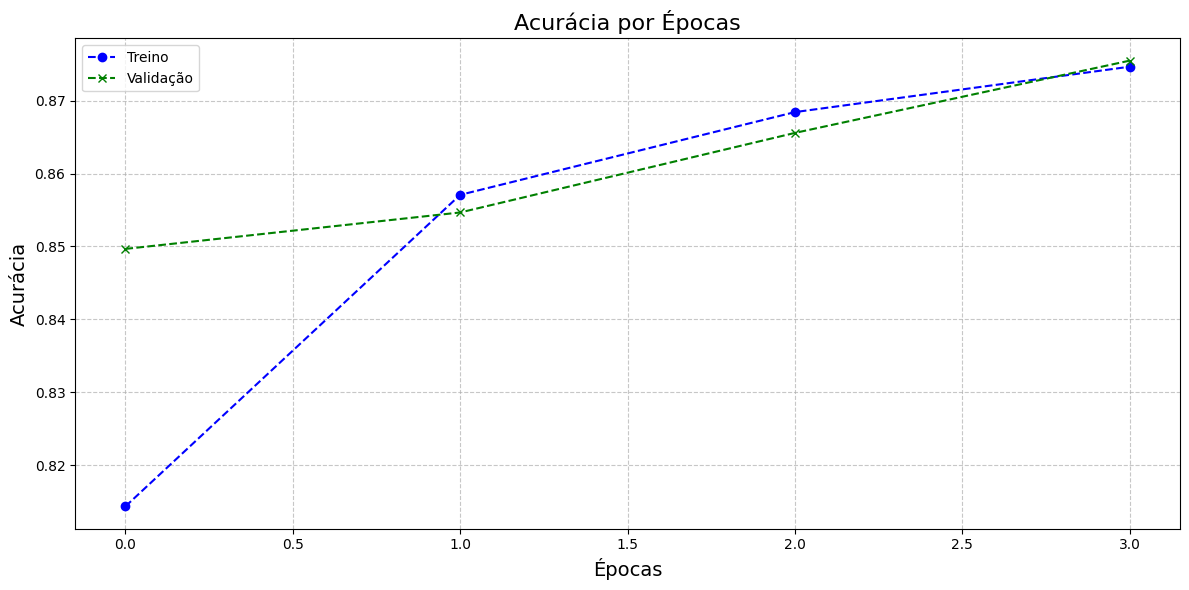

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(historico2.history['accuracy'], label='Treino', color='blue', linestyle='--', marker='o')
plt.plot(historico2.history['val_accuracy'], label='Validação', color='green', linestyle='--', marker='x')

plt.title('Acurácia por Épocas', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plotando a perda


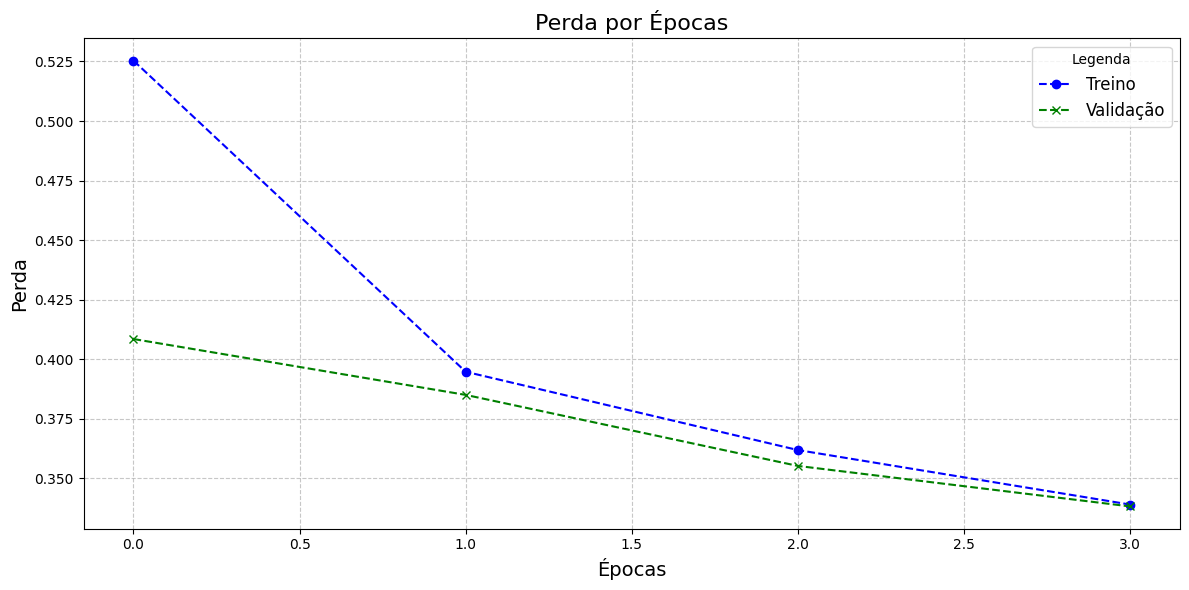

In [53]:
plt.figure(figsize=(12, 6))

plt.plot(historico2.history['loss'], label='Treino', color='blue', linestyle='--', marker='o')
plt.plot(historico2.history['val_loss'], label='Validação', color='green', linestyle='--', marker='x')

plt.title('Perda por Épocas', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.legend(title='Legenda', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- Após a execução inicial, observamos que o desempenho do nosso modelo é significativamente melhor nos dados de treino do que nos dados de validação, indicando um problema de overfitting. Para nos livrar desse problema, tomei as seguintes ações:

1. **Reduzir o Número de Épocas:** Ajustando o número de épocas para se concentrar em uma faixa onde a acurácia nos dados de validação é mais estável.

2. **Aplicar Regularização com Dropout:** Implementação da técnica de *dropout* na rede neural. A cada 10 'neurônios' na primeira camada, 2 serão desativados aleatoriamente durante o treinamento, o que ajudará a prevenir o overfitting e a melhorar a generalização do modelo.

#### Agora, após os ajustes, conseguimos acabar com o overfitting e melhorar muito nosso modelo.

#### Salvando o Modelo:

In [46]:
modelo2.save('modelo.keras')
modelo_salvo = load_model('modelo.keras')

#### Testando os modelos

In [54]:
testes = modelo2.predict(imagens_teste)
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

for i in range (5):
    print('Resultado teste:', np.argmax(testes[i]))
    print('Número da imagem de teste:', identificacoes_teste[i])
    print('')
    print('Resultado dos testes do modelo salvo:',np.argmax(testes_modelo_salvo[i]))
    print('Número da imagem de teste: ', identificacoes_teste[i])
    print('')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Resultado teste: 9
Número da imagem de teste: 9

Resultado dos testes do modelo salvo: 9
Número da imagem de teste:  9

Resultado teste: 2
Número da imagem de teste: 2

Resultado dos testes do modelo salvo: 2
Número da imagem de teste:  2

Resultado teste: 1
Número da imagem de teste: 1

Resultado dos testes do modelo salvo: 1
Número da imagem de teste:  1

Resultado teste: 1
Número da imagem de teste: 1

Resultado dos testes do modelo salvo: 1
Número da imagem de teste:  1

Resultado teste: 6
Número da imagem de teste: 6

Resultado dos testes do modelo salvo: 6
Número da imagem de teste:  6



#### Após alguns testes percebemos que o modelo está funcionando corretamente na maioria dos casos.

## Conclusão Geral

Após a implementação e ajustes do modelo de classificação de imagens de roupas, chegamos às seguintes conclusões:

1. **Desempenho do Modelo:** O modelo foi capaz de classificar corretamente as imagens de teste de acordo com as categorias predefinidas. Os resultados demonstraram precisão na previsão das categorias das imagens testadas, refletindo a eficácia do modelo na tarefa de classificação.

2. **Overfitting e Ajustes:** Inicialmente, o modelo enfrentou problemas de overfitting, onde o desempenho nos dados de treino superava o desempenho nos dados de validação. Porém após alguns ajustes conseguimos solucionar com eficácia esse problema.

3. **Resultados e Performance:** As melhorias implementadas resultaram em um modelo mais equilibrado, com um desempenho mais estável tanto nos dados de treino quanto nos dados de validação. A técnica de *dropout* e a redução do número de épocas ajudaram a alcançar um equilíbrio melhorado, com uma acurácia consistente e uma redução no overfitting.

4. **Conclusão Final:** O modelo final está bem ajustado para a tarefa de classificação de imagens de roupas. Ele mostra uma boa capacidade de generalização e precisão nas previsões, tornando-o uma solução confiável para a classificação automatizada de imagens em diferentes categorias de roupas.

Em resumo, o projeto atingiu seus objetivos principais, oferecendo uma ferramenta eficaz para a identificação automática de tipos de roupas em imagens.
